# ТИТАНИК

**СПИСОК ИСПОЛЬЗУЕМЫХ ИСТОЧНИКОВ:**

1. [Kaggle: Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic)

2. [Medium: Data Preprocessing](https://medium.com/data-science-everywhere/data-preprocessing-a-practical-guide-1b1ce3e884d8)

3. [Kaggle: EDA Titanic](https://www.kaggle.com/demidova/titanic-eda-tutorial/notebook)

4. [Medium: Titanic Survival Prediction — Top 3%](https://medium.com/analytics-vidhya/kaggle-titanic-survival-prediction-top-3-ea6c8dcc9b6c)

**ОГЛАВЛЕНИЕ:**

+ [Введение](#Введение)

+ [1 Загрузка библиотек](#1-Загрузка-библиотек)

+ [2 Загрузка данных](#2-Загрузка-данных)

+ [3 Разведочный анализ данных (EDA)](#3-Разведочный-анализ-данных-(EDA))

  + [3.1 Структура данных](#3.1-Структура-данных)
  
  + [3.2 Пропуски в данных](#3.2-Пропуски-в-данных)
  
  + [3.3 Анализ признаков](#3.3-Анализ-признаков)
  
     + [3.3.1 Целевая переменная - Survived](#3.3.1-Целевая-переменная---Survived)
     
     + [3.3.2 Pclass](#3.3.2-Pclass)
     
     + [3.3.3 Sex](#3.3.3-Sex)
     
     + [3.3.4 Age](#3.3.4-Age)
     
     + [3.3.5 SibSp и Parch](#3.3.5-SibSp-и-Parch)
     
     + [3.3.6 Fare](#3.3.6-Fare)
     
     + [3.3.7 Embarked](#3.3.7-Embarked)
     
     + [3.3.8 Ticket](#3.3.8-Ticket)
     
+ [4 Предобработка данных (data preprocessing)](#4-Предобработка-данных-(data-preprocessing))

  + [4.1 Создание признаков (Feature engineering)](#4.1-Создание-признаков-(Feature-engineering))
  
     + [4.1.1 Титул пассажира](#4.1.1-Титул-пассажира)
     
     + [4.1.2 Размер семьи](#4.1.2-Размер-семьи)
     
     + [4.1.3 Групповая выживаемость](#4.1.3-Групповая-выживаемость)
     
     + [4.1.4 Палуба](#4.1.4-Палуба)
     
  + [4.2 Замена пропусков и выбросов](#4.2-Замена-пропусков-и-выбросов)
  
    + [4.2.1 Fare](#4.2.1-Fare)
    
    + [4.2.2 Embarked](#4.2.2-Embarked)
    
    + [4.2.3 Age](#4.2.3-Age)
    
  + [4.3 Преобразование данных (Data Transformation)](#4.3-Преобразование-данных-(Data-Transformation))  
  
    + [4.3.1 Нормализация](#4.3.1-Нормализация)
    
    + [4.3.2 Дискретизация](#4.3.2-Дискретизация)
    
    + [4.3.3 Факторизация категориальных признаков](#4.3.3-Факторизация-категориальных-признаков)
  
    + [4.3.4 Удаление ненужных колонок](#4.3.4-Удаление-ненужных-колонок)
    
+ [5 Моделирование](#5-Моделирование)    

  + [5.1 Разбиение данных](#5.1-Разбиение-данных)
  
  + [5.2 Обучение моделей](#5.2-Обучение-моделей)
  
    + [5.2.1 LogisticRegression](#5.2.1-LogisticRegression)
    
    + [5.2.2 RandomForestClassifier](#5.2.2-RandomForestClassifier)
    
    + [5.2.3 XGBClassifier](#5.2.3-XGBClassifier)
    
    + [5.2.4 Catboost](#5.2.4-Catboost)
    
    + [5.2.5 LightGBM](#5.2.5-LightGBM)
    
  + [5.3 Сравнение моделей](#5.3-Сравнение-моделей)
  
  + [5.4 Предсказание](#5.4-Предсказание)

# Введение

15 апреля 1912 года, во время своего первого рейса, широко известный «непотопляемый» Титаник затонул после столкновения с айсбергом. К сожалению, на борту не хватило спасательных шлюпок на всех, в результате чего погибли 1502 человека из 2224 пассажиров и членов экипажа.

Хотя в выживании был определенный элемент удачи, похоже, некоторые группы людей выживали с большей вероятностью, чем другие.

В этой задаче мы просим вас построить прогностическую модель, которая отвечает на вопрос: «Какие типы людей выживут с большей вероятностью?» с использованием данных о пассажирах (например, имя, возраст, пол, социально-экономический класс и т. д.). 

**Цель** - предсказать, выжил ли пассажир во время потопления *Титаника* или нет.

**Метрика** - процент правильно предсказанных пассажиров  (*accuracy*). 

**Описание данных:**
+ ***survival*** - Выживание
  + 0 = Нет
  + 1 = Да
+ ***pclass*** - Класс билета
  * 1 = 1-й
  * 2 = 2-й
  * 3 = 3-й 
+ ***sex*** - Пол 	
+ ***Age*** - Возраст в годах	
+ ***sibsp*** - Количество братьев и сестер / супругов на борту Титаника  	
+ ***parch*** -	Количество родителей / детей на борту Титаника  	
+ ***ticket*** - Номер билета 	
+ ***fare*** - Пассажирский тариф  	
+ ***cabin*** - Номер каюты  	
+ ***embarked*** - Порт посадки
  * C = Шербур
  * Q = Квинстаун
  * S = Саутгемптон 

# 1 Загрузка библиотек

In [496]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [196]:
sns.set_theme(style="darkgrid")

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 24
params = {'axes.titlesize':MEDIUM_SIZE,
          'axes.labelsize': SMALL_SIZE,
          'legend.fontsize': SMALL_SIZE,
          'font.size': SMALL_SIZE,
          'xtick.labelsize': SMALL_SIZE,
          'ytick.labelsize': SMALL_SIZE,
          'figure.titlesize': BIGGER_SIZE,
          'figure.figsize': (12, 5)}

plt.rcParams.update(params)

# 2 Загрузка данных

In [197]:
train = pd.read_csv('train.csv', index_col=0)
train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [198]:
test = pd.read_csv('test.csv', index_col=0)
test.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [199]:
train.shape, test.shape

((891, 11), (418, 10))

В тренеровочных данных 891 наблюдение и 11 признаков один из которых - целевой (survial), в тестовых - 418 и 10 соответсвенно

# 3 Разведочный анализ данных (EDA)

## 3.1 Структура данных

In [437]:
all_data = pd.concat([train, test])
all_data.tail(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [438]:
all_data.shape

(1309, 11)

In [439]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


[Типы данных](https://medium.com/nuances-of-programming/%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5-%D1%82%D0%B8%D0%BF%D1%8B-%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85-%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D1%83%D0%B5%D0%BC%D1%8B%D0%B5-%D0%B2-%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%BC-%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B8-b8891039b09)

Целева переменная - *Survived* бинарного типа.

Категориальные признаки - *Embarked, Cabin, Ticket, Sex, Name, Pclass*

Количественные признаки - *Age, SibSp, Parch, Fare*

## 3.2 Пропуски в данных

In [440]:
miss_train = train.isna().sum()
miss_test = test.isna().sum()
miss_all = all_data.isna().sum()

df_NaN = pd.concat([miss_train, miss_test, miss_all], axis=1, keys = ['Train_NA', 'Test_NA', 'All_NA'])
df_NaN = df_NaN[df_NaN['All_NA'] > 0].sort_values(ascending=False, by='All_NA')
df_NaN['All_NA_%'] = round(df_NaN['All_NA'] / all_data.shape[0], 3)
df_NaN

,Train_NA,Test_NA,All_NA,All_NA_%
Cabin,687,327.0,1014,0.775
Survived,0,NaN,418,0.319
Age,177,86.0,263,0.201
Embarked,2,0.0,2,0.002
Fare,0,1.0,1,0.001


На первый взгляд призак Cabin, имеющий 78% пропусков, следовало бы удалить. Но из него можно выделить полезную информацию о расположении каюты, что является важным признаком в вопросе спасения при кораблекрушении. 

## 3.3 Анализ признаков

### 3.3.1 Целевая переменная - Survived

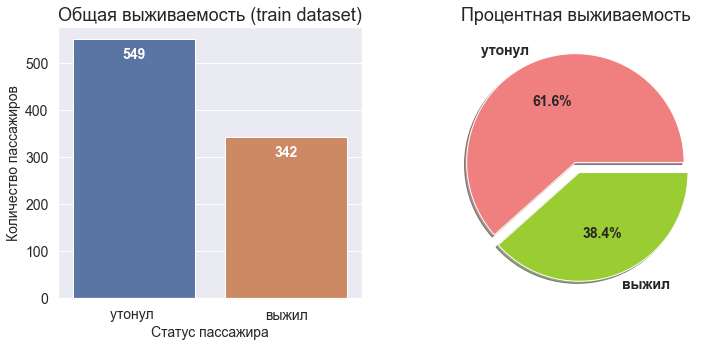

In [441]:
ax1=plt.subplot(1, 2, 1)
sns.countplot(x='Survived', data=train)
plt.xticks( np.arange(2), ['утонул ', 'выжил'] )
plt.title('Общая выживаемость (train dataset)')
plt.xlabel('Статус пассажира')
plt.ylabel('Количество пассажиров')

labels = (train['Survived'].value_counts())
for i, v in enumerate(labels):
    plt.text(i, v-40, str(v), horizontalalignment = 'center', color = 'w', fontweight = 'bold')

ax2=plt.subplot(1, 2, 2)
plt.pie(train['Survived'].value_counts(), explode = [0, 0.1], autopct = '%1.1f%%', 
            shadow = True, colors = ['lightcoral', 'yellowgreen'], labels = ['утонул ', 'выжил'], 
       textprops={'fontweight': 'bold'})  
plt.title("Процентная выживаемость")
plt.show()

Виден дисбаланс классов 1:1.6

### 3.3.2 Pclass

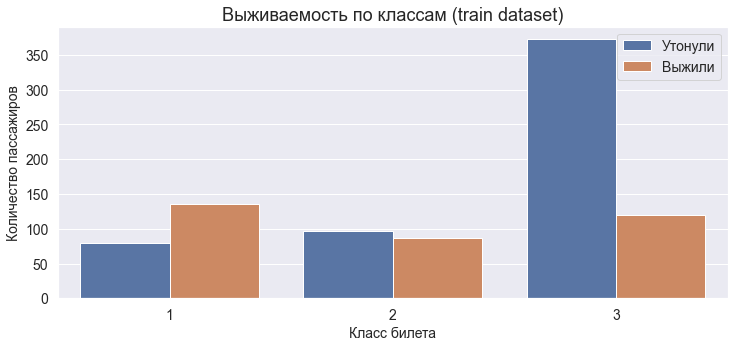

In [442]:
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Выживаемость по классам (train dataset)')
plt.legend(['Утонули', 'Выжили'])
plt.xlabel('Класс билета')
plt.ylabel('Количество пассажиров')
plt.show()

В 1 классе людей выжило больше чем утонуло

### 3.3.3 Sex

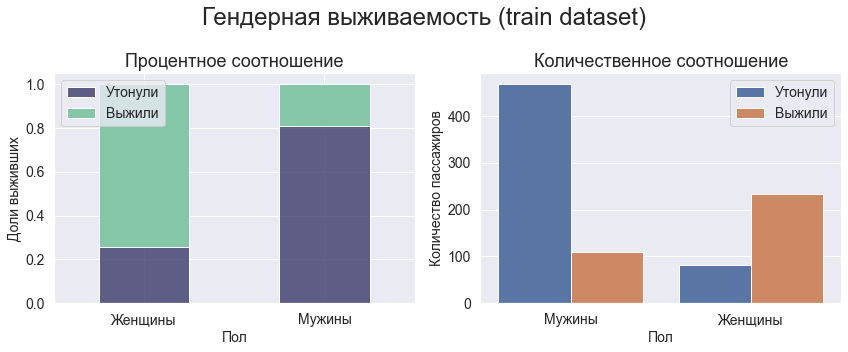

In [443]:
fig = plt.figure()

ax1 = fig.add_subplot(121)
surv_by_sex = train.groupby('Sex')['Survived'].value_counts(normalize = True).unstack()
surv_by_sex = surv_by_sex.sort_values(by=1, ascending = False)
surv_by_sex.plot(kind='bar', stacked='True', color=["#3f3e6fd1", "#85c6a9"], ax = ax1)
plt.title('Процентное соотношение')
plt.legend(['Утонули', 'Выжили'])
plt.xticks( np.arange(2), ['Женщины', 'Мужины'], rotation=0)
plt.xlabel('Пол')
plt.ylabel('Доли выживших')

ax2 = fig.add_subplot(122)
sns.countplot(x='Sex', hue='Survived', data=train, ax=ax2)
plt.title('Количественное соотношение')
plt.legend(['Утонули', 'Выжили'])
plt.xticks( np.arange(2), ['Мужины', 'Женщины'] )
plt.xlabel('Пол')
plt.ylabel('Количество пассажиров')
plt.suptitle('Гендерная выживаемость (train dataset)')
plt.tight_layout()
plt.show()

### 3.3.4 Age

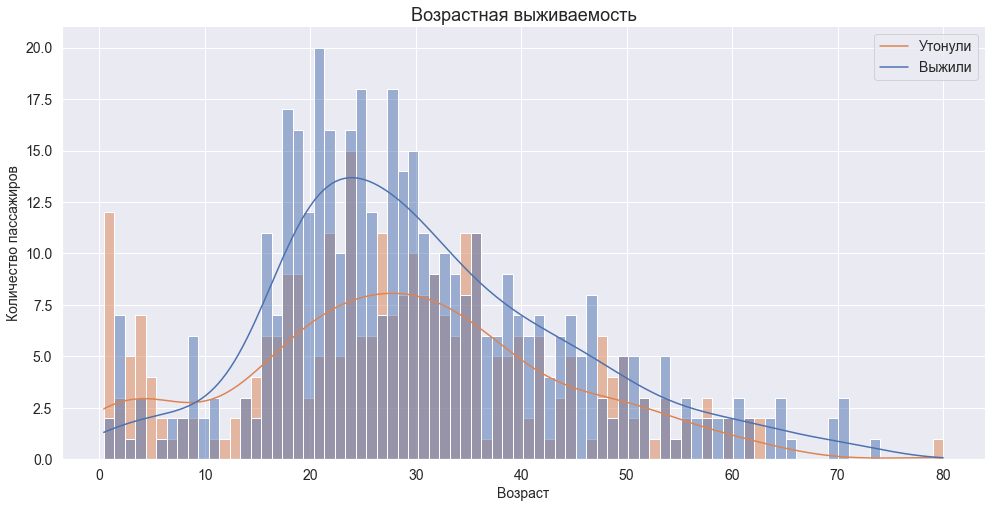

In [444]:
sns.displot(data=train, x="Age", kde=True, hue='Survived', height=7, aspect=2, bins = 80, legend=False)
plt.title('Возрастная выживаемость')
plt.legend(['Утонули', 'Выжили'])
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.show()

Преимущество в спасение было у детей

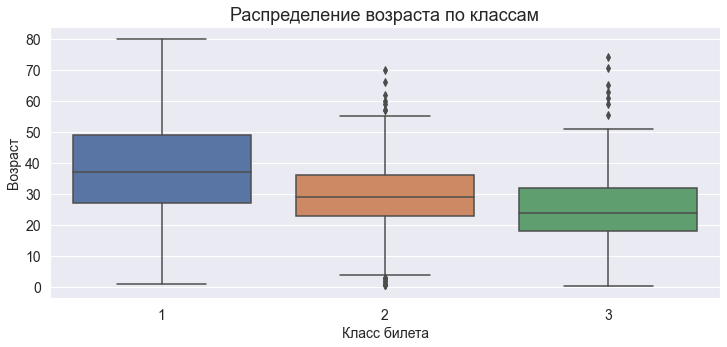

In [445]:
sns.boxplot(x="Pclass", y="Age", data=train)
plt.title('Распределение возраста по классам')
plt.xlabel('Класс билета')
plt.ylabel('Возраст')
plt.show()

Прослеживается тенденция - с увеличением возраста, класс билета повышается

### 3.3.5 SibSp и Parch

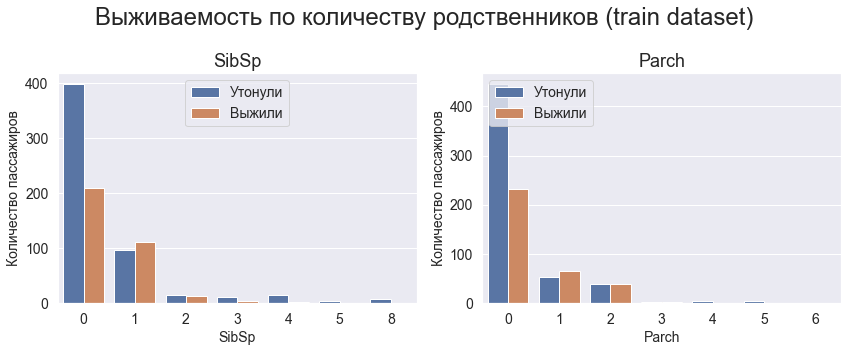

In [446]:
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(121)
sns.countplot(x="SibSp", hue='Survived', data=train, ax=ax1)

plt.title('SibSp')
plt.legend(['Утонули', 'Выжили'])
plt.xlabel('SibSp')
plt.ylabel('Количество пассажиров')

ax2 = fig.add_subplot(122)
sns.countplot(x="Parch", hue='Survived', data=train, ax=ax2)

plt.title('Parch')
plt.legend(['Утонули', 'Выжили'])
plt.xlabel('Parch')
plt.ylabel('Количество пассажиров')
plt.suptitle('Выживаемость по количеству родственников (train dataset)')
plt.tight_layout()
plt.show()

Интересное наблюдение - у кого не было на корабле членов семьи тот с большей вероятностью погибал. В классах с одним родственником выживаемость превалирует над гибелью

Далее создадим переменную размера семьи, объединив эти два признака

### 3.3.6 Fare

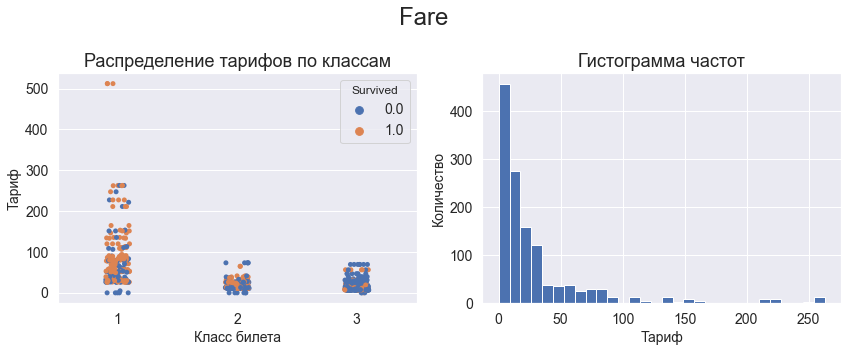

In [447]:
plt.subplot(1, 2, 1)
plt.suptitle('Fare')
plt.title('Распределение тарифов по классам')
sns.stripplot(x="Pclass", y="Fare",  hue = "Survived", data=all_data)
plt.xlabel('Класс билета')
plt.ylabel('Тариф')

plt.subplot(1, 2, 2)
plt.title('Гистограмма частот')
plt.hist(all_data[all_data['Fare'] < 300]['Fare'], bins=30)
plt.xlabel('Тариф')
plt.ylabel('Количество')
plt.tight_layout()

В 1 классе пассажиры с самыми дорогими тарифами (> 500) похожи на выброс

### 3.3.7 Embarked

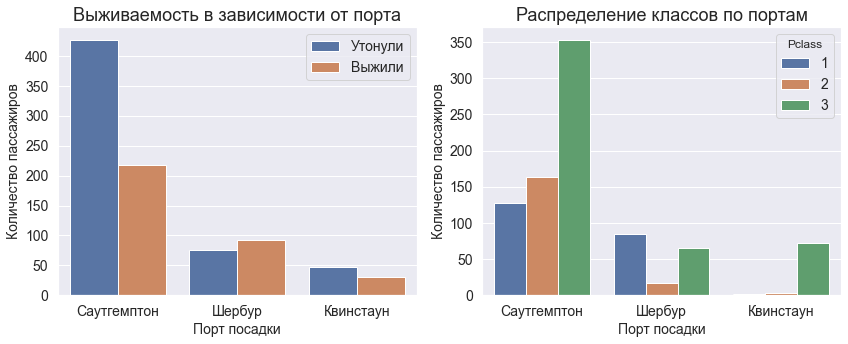

In [448]:
plt.subplot(1, 2, 1)
sns.countplot(x="Embarked", hue='Survived', data=train)
plt.title('Выживаемость в зависимости от порта')
plt.legend(['Утонули', 'Выжили'])
plt.xticks(np.arange(3), ['Саутгемптон', 'Шербур', 'Квинстаун'])
plt.xlabel('Порт посадки')
plt.ylabel('Количество пассажиров')

plt.subplot(1, 2, 2)
sns.countplot(x="Embarked", hue='Pclass', data=train)
plt.title('Распределение классов по портам')
plt.xticks(np.arange(3), ['Саутгемптон', 'Шербур', 'Квинстаун'])
plt.xlabel('Порт посадки')
plt.ylabel('Количество пассажиров')
plt.tight_layout()

Пассажиры отправившиеся из Шербура были преимущественно из 1 класса и спаслось их больше чем утонуло

### 3.3.8 Ticket

In [449]:
print('Всего уникальных билетов:', all_data['Ticket'].nunique())
print('Количество пассажиров:', all_data['Ticket'].count())

Всего уникальных билетов: 929
Количество пассажиров: 1309


Одинаковые билеты возможно у семейных или близких пассажиров

# 4 Предобработка данных (data preprocessing)

## 4.1 Создание признаков (Feature engineering)

### 4.1.1 Титул пассажира

In [450]:
all_data['Title'] = all_data.Name.str.extract('([A-Za-z]+)\.', expand=False)
all_data['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

*Jonkheer* - обозначающий самый низкий ранг в дворянстве

*Countess* - графиня - дворянский титул, супруга графа. (ж)

*Dona* - В Италии и Португалии: форма почтительного упоминания или обращения к женщине (употребляется перед собственными именами представительниц знати); госпожа (ж)

*Don* - почётный титул духовенства и дворян (м)

*Capt* - капитан

*Mme* - замужняя женщина во франции

*Sir* - почётное именование мужчины в англоязычном мире, имеющее два значения — титул и обращение. Исторически это слово было титульным обращением и применялось к членам рыцарских орденов в звании рыцаря, либо к людям имеющих личное рыцарство

*Lady* - жена рыцаря

*Major* - военный офицер

*Mlle* - незамужняя женщина

*Col* - полковник

*Dr* - представитель любого пола, имеющий научную степень

*Rev* - преподобный 

*Ms* - мисс (непонятно замужем или нет)

In [451]:
# заменим титулы на более общие
all_data['Title'] = all_data['Title'].replace('Mme', 'Mrs')
all_data['Title'] = all_data['Title'].replace(['Mlle', 'Ms'], 'Miss')
all_data['Title'] = all_data['Title'].replace(['Col', 'Major', 'Capt'], 'Military')
all_data['Title'] = all_data['Title'].replace(['Lady', 'Sir', 'Don', 'Dona', 'Countess', 'Jonkheer'], 'Honor')

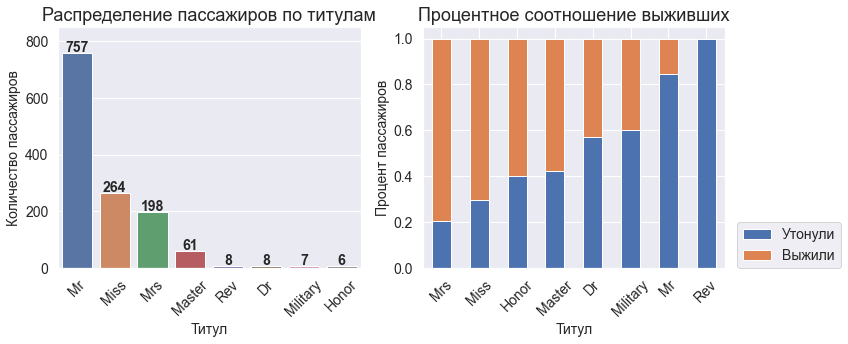

In [452]:
plt.subplot(1, 2, 1)
order = all_data['Title'].value_counts().index
sns.countplot(x="Title", data=all_data, order=order)
plt.title('Распределение пассажиров по титулам')
plt.xlabel('Титул')
plt.ylabel('Количество пассажиров')
plt.xticks(rotation=45)
plt.ylim([0, 850])
for i, v in enumerate(all_data['Title'].value_counts()):
    plt.text(i, v+5, str(v), horizontalalignment = 'center', fontweight = 'bold')

ax = plt.subplot(1, 2, 2)
surv_by_title = all_data.groupby('Title')['Survived'].value_counts(normalize = True).unstack()
surv_by_title = surv_by_title.sort_values(by=1, ascending = False)
surv_by_title.plot(kind='bar', stacked='True', ax=ax)

plt.title('Процентное соотношение выживших')
plt.xlabel('Титул')
plt.ylabel('Процент пассажиров')
plt.legend(['Утонули', 'Выжили'], loc=(1.04, 0))
plt.xticks(rotation=45)
plt.tight_layout()

### 4.1.2 Размер семьи

Вычислим размер семьи сложением двух признаков SibSp и Parch  + 1 сам пассажир

In [453]:
all_data['Family_size'] = all_data['SibSp'] + all_data['Parch'] + 1

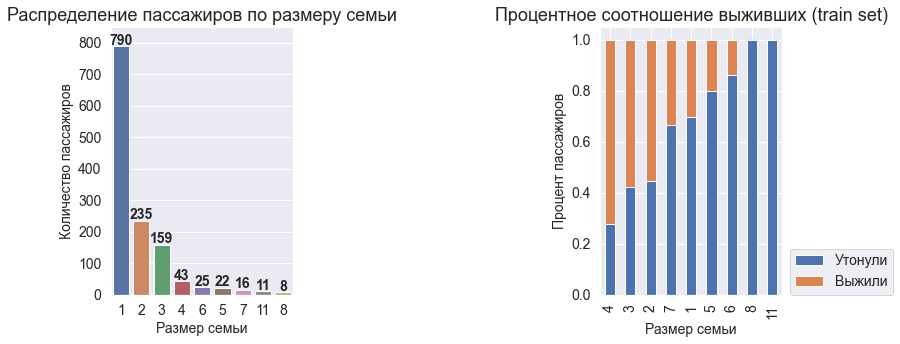

In [454]:
plt.subplot(1, 3, 1)
order = all_data['Family_size'].value_counts().index
sns.countplot(x="Family_size", data=all_data, order=order)
plt.title('Распределение пассажиров по размеру семьи')
plt.xlabel('Размер семьи')
plt.ylabel('Количество пассажиров')
plt.ylim([0, 850])
for i, v in enumerate(all_data['Family_size'].value_counts()):
    plt.text(i, v+5, str(v), horizontalalignment = 'center', fontweight = 'bold')
    
ax = plt.subplot(1, 3, 3)
surv_by_family = all_data.groupby('Family_size')['Survived'].value_counts(normalize = True).unstack()
surv_by_family = surv_by_family.sort_values(by=1, ascending = False)
surv_by_family.plot(kind='bar', stacked='True', ax=ax)

plt.title('Процентное соотношение выживших (train set)')
plt.xlabel('Размер семьи')
plt.ylabel('Процент пассажиров')
plt.legend(['Утонули', 'Выжили'], loc=(1.04, 0))
plt.tight_layout()

Обнаружились несостыковки в количестве людей и размера семьи. Например людей с размером семьи 7 - 16 человек, а должно быть число кратное 7

In [455]:
# создадим вспомогательную колонку фамилии пассажира
all_data['Surname'] = all_data['Name'].apply(lambda name: name.split(',')[0])

**Размер семьи 7**

In [456]:
# пассажиры с размером семьи 7
size_7 = all_data[all_data['Family_size'] == 7]
size_7['Surname'].value_counts()

Andersson    9
Asplund      7
Name: Surname, dtype: int64

In [457]:
size_7[size_7['Surname'] == 'Andersson']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_size,Surname
PassengerId,,,,,,,,,,,,,,
14,0.0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S,Mr,7,Andersson
69,1.0,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.925,NaN,S,Miss,7,Andersson
120,0.0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S,Miss,7,Andersson
542,0.0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S,Miss,7,Andersson
543,0.0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S,Miss,7,Andersson
611,0.0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S,Mrs,7,Andersson
814,0.0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S,Miss,7,Andersson
851,0.0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S,Master,7,Andersson
1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.775,NaN,S,Miss,7,Andersson


У семей номер билета скорее всего одинаковый. У людей с фамилией *Andersson* 2 пассажира имеют отличный от остальных номер билета.

Пассажиры с id 69 и 1106 скорее всего не из семьи Андерсенов так как они имеют отличный от инх билет.

### 4.1.3 Групповая выживаемость

Гипотеза - индивидуальная выживаемость зависит от выживаемости группы, в котрую входит индивид. К группам отнесем например семью или пассажиров с одинаковыми билетами. Как показало исследование зависимости билета от конкретной семьи, семья в основном имеет одинаковый билет. Можно предположить, что если люди не являющиеся семьей (по фамильному признаку) имеют одинаковый билет, то у них близкие отношения. Таким образом, если большинство из группы спаслись, то и сам индивид вероятно спасется и наоборот

In [458]:
# сгруппируем по билетам и сохраним индексы группы, в которой больше 1 билета. В итоге получим серию: билет-индексы
group_indices  = all_data.groupby('Ticket').apply(lambda df: df.index if len(df) > 1 else None).dropna()
# создадим колонку с id группы; 0 - нет одинакового билета
all_data['Group_ID'] = 0
gr_id = 1
for indexs in group_indices.values:
    all_data.loc[indexs, 'Group_ID'] = gr_id
    gr_id += 1

[Агрегация и группировка](https://dfedorov.spb.ru/pandas/%D0%9F%D0%BE%D0%B4%D1%80%D0%BE%D0%B1%D0%BD%D0%BE%D0%B5%20%D1%80%D1%83%D0%BA%D0%BE%D0%B2%D0%BE%D0%B4%D1%81%D1%82%D0%B2%D0%BE%20%D0%BF%D0%BE%20%D0%B3%D1%80%D1%83%D0%BF%D0%BF%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B5%20%D0%B8%20%D0%B0%D0%B3%D1%80%D0%B5%D0%B3%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8E%20%D1%81%20%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E%20pandas.html)

In [459]:
def group_survived(series):
    """
    Подсчитывает в каждой группе количество выживших. Если есть хотя бы 1, то возвращается 1, если нет, то 0.5
    """
    s = series[series == 1].count()
    return 1 if s > 0 else 0.5

In [460]:
gr = all_data[all_data['Group_ID'] != 0].groupby('Group_ID').agg({'Survived': [group_survived]})
gr.set_axis(['GroupSurvived'], axis=1, inplace=True)
gr.reset_index(inplace=True)
gr.head()

,Group_ID,GroupSurvived
0,1,1.0
1,2,1.0
2,3,0.5
3,4,1.0
4,5,1.0


In [461]:
# соединение таблиц по ID группы
all_data = all_data.reset_index().merge(gr, how='left', on='Group_ID')

In [462]:
# заполним 0 людей без группы
all_data['GroupSurvived'].fillna(0, inplace=True)

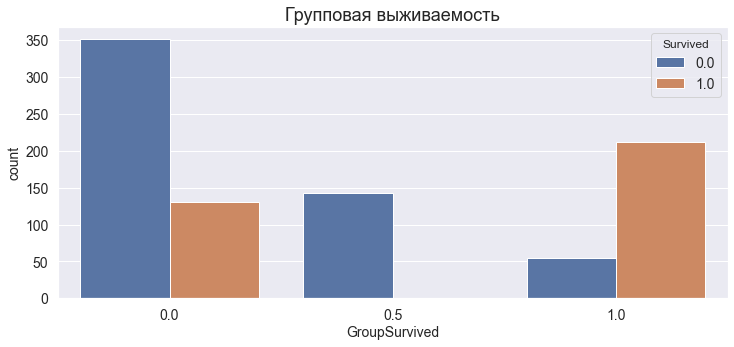

In [463]:
sns.countplot(x='GroupSurvived', data=all_data, hue='Survived')
plt.title('Групповая выживаемость')
plt.show()

Значение 0 относится к людям без группы, 0.5 - это люди в группе, но из их группы никто не выжил, 1 - это люди, в группах которых есть хотя бы 1 выживший

### 4.1.4 Палуба

Оставим только первую букву

In [464]:
all_data['deck'] = all_data['Cabin'].str.extract(r'([a-zA-Z])')
all_data.loc[all_data['deck'].isna(), 'deck'] = 'Unknown'

In [465]:
all_data['deck'].unique()

array(['Unknown', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [466]:
all_data['IsDeck'] = all_data['Cabin'].apply(lambda x: 1 if isinstance(x, str) else 0)

## 4.2 Замена пропусков и выбросов

### 4.2.1 Fare

По разведочному анализу обнаружили выбросы в 1 классе со значеием Fare более 500

In [467]:
all_data[all_data.Fare > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_size,Surname,Group_ID,GroupSurvived,deck,IsDeck
258,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss,1,Ward,195,1.0,Unknown,0
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr,2,Cardeza,195,1.0,B,1
737,738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mr,1,Lesurer,195,1.0,B,1
1234,1235,NaN,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mrs,2,Cardeza,195,1.0,B,1


Заменим их на второе самое максимальное значение

In [468]:
all_data.Fare.sort_values(ascending=False)[:7]

258     512.3292
679     512.3292
1234    512.3292
737     512.3292
341     263.0000
944     263.0000
27      263.0000
Name: Fare, dtype: float64

In [469]:
all_data.loc[all_data[all_data.Fare > 500].index, 'Fare'] = 263

Заменим пропуск медианой по классу

In [470]:
all_data[all_data.Fare.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_size,Surname,Group_ID,GroupSurvived,deck,IsDeck
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr,1,Storey,0,0.0,Unknown,0


In [471]:
all_data['Fare'] = all_data['Fare'].fillna(all_data.groupby('Pclass')["Fare"].transform('median'))

### 4.2.2 Embarked 

In [472]:
all_data[all_data.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_size,Surname,Group_ID,GroupSurvived,deck,IsDeck
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,1,Icard,12,1.0,B,1
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,1,Stone,12,1.0,B,1


Заменим пропуски модой по классу и тарифу

In [473]:
mode = all_data[(all_data['Fare'] > 77) & (all_data['Fare'] < 82) & (all_data['Pclass'] == 1)]['Embarked'].mode()
all_data.loc[all_data['Embarked'].isna(), 'Embarked'] = mode[0]

### 4.2.3 Age

Заменим пропуски возраста медианой соответсвующих групп

In [474]:
all_data['Age'] = all_data.groupby(['Pclass', 'Sex', 'Title'])['Age']\
                    .apply(lambda x: x.fillna(x.median()))

## 4.3 Преобразование данных (Data Transformation)

### 4.3.1 Нормализация

Преобразуем тариф к нормальному распределению

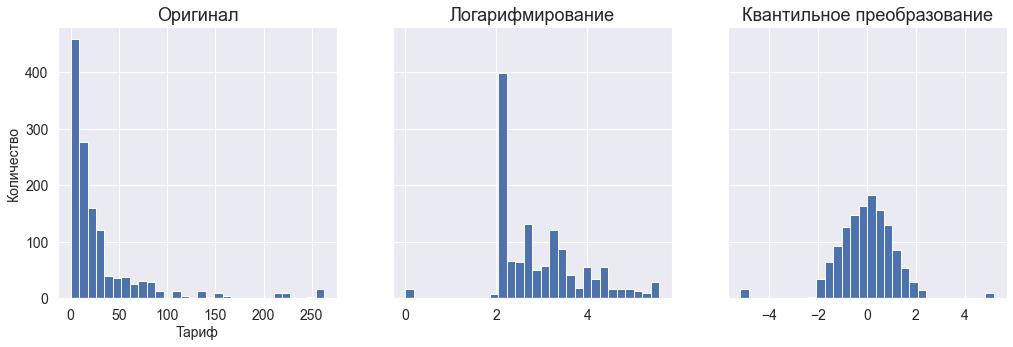

In [479]:
fig, ax = plt.subplots(1, 3, figsize=(17, 5), sharey=True)
all_data['Fare'].hist(bins=30, ax=ax[0])
ax[0].set_title('Оригинал')
ax[0].set_ylabel('Количество')
ax[0].set_xlabel('Тариф')

log = all_data['Fare'].apply(np.log1p)
ax[1].hist(log, bins=30)
ax[1].set_title('Логарифмирование')

q = quantile_transform(all_data[['Fare']], n_quantiles=100, output_distribution="normal")
ax[2].hist(q, bins=30)
ax[2].set_title('Квантильное преобразование')
plt.show()

In [480]:
all_data['QuantileFare'] = q 

### 4.3.2 Дискретизация 

Возраст, тариф и размер семьи разобьем на меньшее число дискретных значений

**Возраст**

Разобьем на следущие категории:

0 - 16 - дети

16 - 25 - молодые люди

25 - 35 - семейные

35 - 50 - зрелые

50 и > - старые

In [475]:
def sampling_age(age):
    if age <= 16:
        return 'Child'
    elif 16 < age <= 25:
        return 'Young'
    elif 25 < age <= 35:
        return 'FamilyAge'
    elif 35 < age <= 50:
        return 'Adult'
    else:
        return 'Old'

In [476]:
all_data['CatAge'] = all_data['Age'].apply(sampling_age)

**Размер семьи**

1 - одинокий человек

2 - 3 - маленькая

4 - 5 - обычная

6 и > - большая

In [477]:
def sampling_family_size(size):
    if size == 1:
        return 'Lonely '
    elif 1 < size <= 3:
        return 'Small'
    elif 4 < size <= 5:
        return 'Normal'
    else:
        return 'Big'

In [478]:
all_data['CatFamSize'] = all_data['Family_size'].apply(sampling_family_size)

**Тариф**

In [ ]:
all_data['CatFare'] = pd.qcut(all_data['QuantileFare'], 5, labels=range(5))

### 4.3.3 Факторизация категориальных признаков

In [482]:
all_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Family_size,Surname,Group_ID,GroupSurvived,deck,IsDeck,CatAge,CatFamSize,QuantileFare,CatFare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,2,Braund,0,0.0,Unknown,0,Young,Small,-1.399657,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,2,Cumings,190,1.0,C,1,Adult,Small,1.191240,4
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,Heikkinen,0,0.0,Unknown,0,FamilyAge,Lonely,-0.619855,1


Закодируем категориальные признаки, которые будем использовать в обучение, через One Hot Encoding

In [483]:
cat_columns = ['Pclass', 'Sex', 'Embarked', 'Title', 'deck', 'CatFamSize', 'CatAge', 'CatFare']
num_columns = list(set(all_data.columns) - set(cat_columns))

In [484]:
enc = OneHotEncoder(sparse=False)
x_ohe = enc.fit_transform(all_data[cat_columns])
df_cat = pd.DataFrame(x_ohe, columns=enc.get_feature_names(), index=all_data.index)

In [485]:
df_full = all_data[num_columns].join(df_cat)
df_full

,SibSp,Survived,Ticket,Fare,Cabin,PassengerId,Group_ID,Family_size,IsDeck,Parch,...,x6_Adult,x6_Child,x6_FamilyAge,x6_Old,x6_Young,x7_0,x7_1,x7_2,x7_3,x7_4
0,1,0.0,A/5 21171,7.2500,NaN,1,0,2,0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1,1.0,PC 17599,71.2833,C85,2,190,2,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,1.0,STON/O2. 3101282,7.9250,NaN,3,0,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,1.0,113803,53.1000,C123,4,20,2,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0.0,373450,8.0500,NaN,5,0,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,NaN,A.5. 3236,8.0500,NaN,1305,0,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1305,0,NaN,PC 17758,108.9000,C105,1306,198,1,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1306,0,NaN,SOTON/O.Q. 3101262,7.2500,NaN,1307,0,1,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1307,0,NaN,359309,8.0500,NaN,1308,0,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### 4.3.4 Удаление ненужных колонок

In [486]:
df_full.columns

Index(['SibSp', 'Survived', 'Ticket', 'Fare', 'Cabin', 'PassengerId',
       'Group_ID', 'Family_size', 'IsDeck', 'Parch', 'GroupSurvived',
       'Surname', 'QuantileFare', 'Name', 'Age', 'x0_1', 'x0_2', 'x0_3',
       'x1_female', 'x1_male', 'x2_C', 'x2_Q', 'x2_S', 'x3_Dr', 'x3_Honor',
       'x3_Master', 'x3_Military', 'x3_Miss', 'x3_Mr', 'x3_Mrs', 'x3_Rev',
       'x4_A', 'x4_B', 'x4_C', 'x4_D', 'x4_E', 'x4_F', 'x4_G', 'x4_T',
       'x4_Unknown', 'x5_Big', 'x5_Lonely ', 'x5_Normal', 'x5_Small',
       'x6_Adult', 'x6_Child', 'x6_FamilyAge', 'x6_Old', 'x6_Young', 'x7_0',
       'x7_1', 'x7_2', 'x7_3', 'x7_4'],
      dtype='object')

In [487]:
drop_columns = ['Name', 'Ticket', 'Cabin', 'Surname', 'Fare', 'Age', 'Family_size', 'Parch', 'SibSp', 'Group_ID'\
                , 'x1_male', 'QuantileFare', 'Fare']
df_full.drop(drop_columns, axis=1, inplace=True)

In [490]:
df_full.head()

,Survived,PassengerId,IsDeck,GroupSurvived,x0_1,x0_2,x0_3,x1_female,x2_C,x2_Q,...,x6_Adult,x6_Child,x6_FamilyAge,x6_Old,x6_Young,x7_0,x7_1,x7_2,x7_3,x7_4
0,0.0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1.0,2,1,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,3,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,4,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,5,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [491]:
df_full.set_index('PassengerId', inplace=True)

# 5 Моделирование

## 5.1 Разбиение данных

Выделим данные на тестовые и тренировочные

In [492]:
df_train = df_full[~df_full['Survived'].isna()]
df_predict = df_full[df_full['Survived'].isna()]
df_train.shape, df_predict.shape

((891, 41), (418, 41))

In [493]:
X_pred = df_predict.drop('Survived', axis=1)

X_full = df_train.drop('Survived', axis=1)
y_full = df_train['Survived']

y_full = y_full.astype('int16')

Также выделим часть валидационных данных

In [494]:
X_train, X_test, y_train, y_val = train_test_split(X_full, y_full, test_size=0.33, random_state=42)

## 5.2 Обучение моделей

### 5.2.1 LogisticRegression

In [497]:
model_logreg = LogisticRegression(random_state=42, max_iter=3000)

parameters = {'C': [0.01, 0.1, 1.0, 10., 100.],
             'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

grid_logreg = GridSearchCV(model_logreg, parameters, cv=StratifiedKFold(n_splits=4), n_jobs = -1, scoring='accuracy')
grid_logreg.fit(X_train, y_train)
best_logreg = grid_logreg.best_estimator_
predictions = best_logreg.predict(X_test)
acc_logreg = accuracy_score(predictions, y_val)
print('Точность:', acc_logreg)

Точность: 0.8271186440677966


### 5.2.2 RandomForestClassifier

In [499]:
model_rfc = RandomForestClassifier(random_state=42)

parameters = {'n_estimators': [200, 1000, 2000],
                     'max_depth': [4, 6, 8, 10],
                     'min_samples_leaf': [2, 4, 8]}

grid_rfc = GridSearchCV(model_rfc, parameters, cv=StratifiedKFold(n_splits=4), n_jobs = -1, scoring='accuracy')
grid_rfc.fit(X_train, y_train)
best_rfc = grid_rfc.best_estimator_
predictions = best_rfc.predict(X_test)
acc_rfc = accuracy_score(predictions, y_val)
print('Точность:', acc_rfc)

Точность: 0.8610169491525423


### 5.2.3 XGBClassifier

[Док. xgboost](https://xgboost.readthedocs.io/en/latest/python/python_api.html?highlight=Classifier#xgboost.XGBClassifier.fit)

In [202]:
# model_xgb = XGBClassifier(random_state=42, tree_method='gpu_hist')

# parameters = {'n_estimators': [200, 1000, 2000],
#                      'max_depth': [4, 6, 8],
#                      'learning_rate': [0.001, 0.01, 0.1,],
#                      'gamma': [0, 1, 5],
#                      'min_child_weight':[3, 6, 10],
#                      'subsample': [0.5, 0.8, 0.9]}

# grid_xgb = GridSearchCV(model_xgb, parameters, cv=StratifiedKFold(n_splits=4), n_jobs = -1, scoring='accuracy')
# grid_xgb.fit(X_train, y_train)
# best_xgb = grid_xgb.best_estimator_
# predictions = best_xgb.predict(X_test)
# acc_xgb = accuracy_score(predictions, y_val)
# print('Точность:', acc_xgb)

C:\Programs\Anaconda\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:19:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Точность: 0.8779661016949153


In [ ]:
# model_xgb = XGBClassifier(random_state=42, max_depth=4)
# model_xgb.fit(X_train, y_train)
# predictions = model_xgb.predict(X_test)
# acc_xgb = accuracy_score(predictions, y_val)
# print('Точность:', acc_xgb)

### 5.2.4 Catboost

[Док. catboost](https://catboost.ai/)

In [500]:
model_cat = CatBoostClassifier(random_state=42)

parameters = {'n_estimators': [1000, 2000],
                     'depth': [4, 6, 8],
                     'learning_rate': [0.001, 0.01, 0.1,],
                     'min_child_samples':[20, 40, 60],
                     'l2_leaf_reg': [3, 5, 7, 9]}

grid_cat = GridSearchCV(model_cat, parameters, cv=StratifiedKFold(n_splits=4), n_jobs=-1, scoring='accuracy')
grid_cat.fit(X_train, y_train)
best_cat = grid_cat.best_estimator_
predictions = best_cat.predict(X_test)
acc_cat = accuracy_score(predictions, y_val)
print('Точность:', acc_cat)

0:	learn: 0.6921868	total: 305ms	remaining: 10m 9s
1:	learn: 0.6912933	total: 345ms	remaining: 5m 44s
2:	learn: 0.6903259	total: 358ms	remaining: 3m 58s
3:	learn: 0.6895165	total: 369ms	remaining: 3m 3s
4:	learn: 0.6886825	total: 376ms	remaining: 2m 30s
5:	learn: 0.6879317	total: 381ms	remaining: 2m 6s
6:	learn: 0.6871510	total: 386ms	remaining: 1m 49s
7:	learn: 0.6863143	total: 392ms	remaining: 1m 37s
8:	learn: 0.6853763	total: 399ms	remaining: 1m 28s
9:	learn: 0.6844381	total: 403ms	remaining: 1m 20s
10:	learn: 0.6835555	total: 407ms	remaining: 1m 13s
11:	learn: 0.6827203	total: 411ms	remaining: 1m 8s
12:	learn: 0.6817404	total: 415ms	remaining: 1m 3s
13:	learn: 0.6808049	total: 418ms	remaining: 59.3s
14:	learn: 0.6799353	total: 422ms	remaining: 55.8s
15:	learn: 0.6791972	total: 525ms	remaining: 1m 5s
16:	learn: 0.6784739	total: 532ms	remaining: 1m 2s
17:	learn: 0.6776503	total: 539ms	remaining: 59.3s
18:	learn: 0.6767859	total: 545ms	remaining: 56.8s
19:	learn: 0.6758523	total: 550m

176:	learn: 0.5661956	total: 1.26s	remaining: 13s
177:	learn: 0.5656929	total: 1.26s	remaining: 12.9s
178:	learn: 0.5651149	total: 1.26s	remaining: 12.9s
179:	learn: 0.5644945	total: 1.27s	remaining: 12.8s
180:	learn: 0.5638937	total: 1.27s	remaining: 12.8s
181:	learn: 0.5632846	total: 1.28s	remaining: 12.7s
182:	learn: 0.5627862	total: 1.28s	remaining: 12.7s
183:	learn: 0.5621603	total: 1.28s	remaining: 12.7s
184:	learn: 0.5616340	total: 1.29s	remaining: 12.6s
185:	learn: 0.5611099	total: 1.29s	remaining: 12.6s
186:	learn: 0.5605495	total: 1.3s	remaining: 12.6s
187:	learn: 0.5601041	total: 1.3s	remaining: 12.5s
188:	learn: 0.5596065	total: 1.3s	remaining: 12.5s
189:	learn: 0.5593075	total: 1.31s	remaining: 12.5s
190:	learn: 0.5587274	total: 1.31s	remaining: 12.4s
191:	learn: 0.5582601	total: 1.32s	remaining: 12.4s
192:	learn: 0.5577146	total: 1.32s	remaining: 12.4s
193:	learn: 0.5572086	total: 1.32s	remaining: 12.3s
194:	learn: 0.5565897	total: 1.33s	remaining: 12.3s
195:	learn: 0.556

345:	learn: 0.4890823	total: 1.94s	remaining: 9.28s
346:	learn: 0.4887835	total: 1.95s	remaining: 9.27s
347:	learn: 0.4884731	total: 1.95s	remaining: 9.27s
348:	learn: 0.4880485	total: 1.96s	remaining: 9.25s
349:	learn: 0.4878152	total: 1.96s	remaining: 9.25s
350:	learn: 0.4873558	total: 1.97s	remaining: 9.24s
351:	learn: 0.4870395	total: 1.97s	remaining: 9.23s
352:	learn: 0.4866133	total: 1.98s	remaining: 9.23s
353:	learn: 0.4862924	total: 1.98s	remaining: 9.21s
354:	learn: 0.4861116	total: 1.98s	remaining: 9.19s
355:	learn: 0.4856884	total: 1.99s	remaining: 9.17s
356:	learn: 0.4852622	total: 1.99s	remaining: 9.16s
357:	learn: 0.4848467	total: 2s	remaining: 9.15s
358:	learn: 0.4844234	total: 2s	remaining: 9.14s
359:	learn: 0.4839935	total: 2s	remaining: 9.13s
360:	learn: 0.4835992	total: 2.01s	remaining: 9.12s
361:	learn: 0.4832892	total: 2.01s	remaining: 9.11s
362:	learn: 0.4828987	total: 2.02s	remaining: 9.1s
363:	learn: 0.4826965	total: 2.02s	remaining: 9.08s
364:	learn: 0.4823324	

514:	learn: 0.4372383	total: 2.62s	remaining: 7.54s
515:	learn: 0.4369714	total: 2.62s	remaining: 7.53s
516:	learn: 0.4366427	total: 2.62s	remaining: 7.52s
517:	learn: 0.4364102	total: 2.63s	remaining: 7.51s
518:	learn: 0.4362256	total: 2.63s	remaining: 7.5s
519:	learn: 0.4359579	total: 2.63s	remaining: 7.5s
520:	learn: 0.4356941	total: 2.64s	remaining: 7.49s
521:	learn: 0.4355402	total: 2.64s	remaining: 7.48s
522:	learn: 0.4353045	total: 2.64s	remaining: 7.47s
523:	learn: 0.4350243	total: 2.65s	remaining: 7.46s
524:	learn: 0.4347299	total: 2.65s	remaining: 7.45s
525:	learn: 0.4344531	total: 2.66s	remaining: 7.44s
526:	learn: 0.4341586	total: 2.66s	remaining: 7.44s
527:	learn: 0.4338840	total: 2.66s	remaining: 7.43s
528:	learn: 0.4336528	total: 2.67s	remaining: 7.42s
529:	learn: 0.4334024	total: 2.67s	remaining: 7.41s
530:	learn: 0.4333052	total: 2.67s	remaining: 7.4s
531:	learn: 0.4330450	total: 2.68s	remaining: 7.39s
532:	learn: 0.4327588	total: 2.68s	remaining: 7.38s
533:	learn: 0.4

691:	learn: 0.4004203	total: 3.3s	remaining: 6.24s
692:	learn: 0.4002589	total: 3.3s	remaining: 6.23s
693:	learn: 0.4000757	total: 3.31s	remaining: 6.22s
694:	learn: 0.3998985	total: 3.31s	remaining: 6.22s
695:	learn: 0.3997114	total: 3.32s	remaining: 6.21s
696:	learn: 0.3995577	total: 3.32s	remaining: 6.21s
697:	learn: 0.3993578	total: 3.32s	remaining: 6.2s
698:	learn: 0.3992285	total: 3.33s	remaining: 6.2s
699:	learn: 0.3990705	total: 3.33s	remaining: 6.19s
700:	learn: 0.3989053	total: 3.34s	remaining: 6.18s
701:	learn: 0.3988094	total: 3.34s	remaining: 6.18s
702:	learn: 0.3986125	total: 3.34s	remaining: 6.17s
703:	learn: 0.3984364	total: 3.35s	remaining: 6.17s
704:	learn: 0.3982307	total: 3.35s	remaining: 6.16s
705:	learn: 0.3980590	total: 3.36s	remaining: 6.15s
706:	learn: 0.3978835	total: 3.36s	remaining: 6.15s
707:	learn: 0.3977265	total: 3.37s	remaining: 6.14s
708:	learn: 0.3975527	total: 3.37s	remaining: 6.13s
709:	learn: 0.3973894	total: 3.37s	remaining: 6.13s
710:	learn: 0.39

876:	learn: 0.3731570	total: 4.3s	remaining: 5.51s
877:	learn: 0.3730299	total: 4.31s	remaining: 5.51s
878:	learn: 0.3729741	total: 4.31s	remaining: 5.5s
879:	learn: 0.3728258	total: 4.32s	remaining: 5.49s
880:	learn: 0.3726756	total: 4.32s	remaining: 5.49s
881:	learn: 0.3725326	total: 4.33s	remaining: 5.48s
882:	learn: 0.3724459	total: 4.33s	remaining: 5.48s
883:	learn: 0.3722797	total: 4.34s	remaining: 5.47s
884:	learn: 0.3721818	total: 4.34s	remaining: 5.47s
885:	learn: 0.3720486	total: 4.35s	remaining: 5.46s
886:	learn: 0.3719673	total: 4.35s	remaining: 5.46s
887:	learn: 0.3718409	total: 4.36s	remaining: 5.45s
888:	learn: 0.3717221	total: 4.36s	remaining: 5.45s
889:	learn: 0.3716399	total: 4.37s	remaining: 5.45s
890:	learn: 0.3714829	total: 4.37s	remaining: 5.44s
891:	learn: 0.3713364	total: 4.38s	remaining: 5.44s
892:	learn: 0.3711844	total: 4.38s	remaining: 5.43s
893:	learn: 0.3710344	total: 4.41s	remaining: 5.45s
894:	learn: 0.3708864	total: 4.42s	remaining: 5.46s
895:	learn: 0.

1061:	learn: 0.3534179	total: 5.51s	remaining: 4.86s
1062:	learn: 0.3533598	total: 5.51s	remaining: 4.86s
1063:	learn: 0.3532926	total: 5.52s	remaining: 4.85s
1064:	learn: 0.3532039	total: 5.52s	remaining: 4.85s
1065:	learn: 0.3531231	total: 5.53s	remaining: 4.84s
1066:	learn: 0.3530599	total: 5.53s	remaining: 4.84s
1067:	learn: 0.3529641	total: 5.54s	remaining: 4.83s
1068:	learn: 0.3528528	total: 5.54s	remaining: 4.83s
1069:	learn: 0.3527872	total: 5.55s	remaining: 4.82s
1070:	learn: 0.3527211	total: 5.55s	remaining: 4.82s
1071:	learn: 0.3527017	total: 5.55s	remaining: 4.81s
1072:	learn: 0.3526140	total: 5.56s	remaining: 4.8s
1073:	learn: 0.3525144	total: 5.56s	remaining: 4.79s
1074:	learn: 0.3524553	total: 5.57s	remaining: 4.79s
1075:	learn: 0.3523916	total: 5.57s	remaining: 4.79s
1076:	learn: 0.3522992	total: 5.58s	remaining: 4.78s
1077:	learn: 0.3522379	total: 5.58s	remaining: 4.77s
1078:	learn: 0.3522033	total: 5.59s	remaining: 4.77s
1079:	learn: 0.3521367	total: 5.59s	remaining: 

1252:	learn: 0.3389974	total: 6.36s	remaining: 3.79s
1253:	learn: 0.3389245	total: 6.36s	remaining: 3.78s
1254:	learn: 0.3388765	total: 6.36s	remaining: 3.78s
1255:	learn: 0.3388004	total: 6.37s	remaining: 3.77s
1256:	learn: 0.3387790	total: 6.37s	remaining: 3.77s
1257:	learn: 0.3387268	total: 6.38s	remaining: 3.76s
1258:	learn: 0.3386785	total: 6.38s	remaining: 3.76s
1259:	learn: 0.3385876	total: 6.39s	remaining: 3.75s
1260:	learn: 0.3385072	total: 6.39s	remaining: 3.75s
1261:	learn: 0.3384653	total: 6.4s	remaining: 3.74s
1262:	learn: 0.3383877	total: 6.4s	remaining: 3.74s
1263:	learn: 0.3382936	total: 6.41s	remaining: 3.73s
1264:	learn: 0.3382197	total: 6.41s	remaining: 3.72s
1265:	learn: 0.3381709	total: 6.42s	remaining: 3.72s
1266:	learn: 0.3380654	total: 6.42s	remaining: 3.71s
1267:	learn: 0.3380199	total: 6.42s	remaining: 3.71s
1268:	learn: 0.3379522	total: 6.43s	remaining: 3.7s
1269:	learn: 0.3378663	total: 6.43s	remaining: 3.7s
1270:	learn: 0.3378412	total: 6.43s	remaining: 3.6

1435:	learn: 0.3280479	total: 7.2s	remaining: 2.83s
1436:	learn: 0.3279794	total: 7.2s	remaining: 2.82s
1437:	learn: 0.3279072	total: 7.21s	remaining: 2.82s
1438:	learn: 0.3278637	total: 7.21s	remaining: 2.81s
1439:	learn: 0.3278003	total: 7.21s	remaining: 2.81s
1440:	learn: 0.3277432	total: 7.22s	remaining: 2.8s
1441:	learn: 0.3276503	total: 7.22s	remaining: 2.79s
1442:	learn: 0.3276160	total: 7.23s	remaining: 2.79s
1443:	learn: 0.3275361	total: 7.23s	remaining: 2.78s
1444:	learn: 0.3274648	total: 7.24s	remaining: 2.78s
1445:	learn: 0.3273936	total: 7.24s	remaining: 2.77s
1446:	learn: 0.3273210	total: 7.24s	remaining: 2.77s
1447:	learn: 0.3272692	total: 7.25s	remaining: 2.76s
1448:	learn: 0.3271931	total: 7.25s	remaining: 2.76s
1449:	learn: 0.3271153	total: 7.26s	remaining: 2.75s
1450:	learn: 0.3270539	total: 7.26s	remaining: 2.75s
1451:	learn: 0.3270018	total: 7.26s	remaining: 2.74s
1452:	learn: 0.3269346	total: 7.27s	remaining: 2.74s
1453:	learn: 0.3269045	total: 7.27s	remaining: 2.

1602:	learn: 0.3197472	total: 7.88s	remaining: 1.95s
1603:	learn: 0.3197087	total: 7.88s	remaining: 1.95s
1604:	learn: 0.3196975	total: 7.89s	remaining: 1.94s
1605:	learn: 0.3196501	total: 7.89s	remaining: 1.94s
1606:	learn: 0.3195987	total: 7.89s	remaining: 1.93s
1607:	learn: 0.3195481	total: 7.9s	remaining: 1.93s
1608:	learn: 0.3195067	total: 7.9s	remaining: 1.92s
1609:	learn: 0.3194642	total: 7.91s	remaining: 1.92s
1610:	learn: 0.3194315	total: 7.91s	remaining: 1.91s
1611:	learn: 0.3193764	total: 7.92s	remaining: 1.91s
1612:	learn: 0.3193328	total: 7.92s	remaining: 1.9s
1613:	learn: 0.3192762	total: 7.92s	remaining: 1.9s
1614:	learn: 0.3192157	total: 7.93s	remaining: 1.89s
1615:	learn: 0.3191926	total: 7.93s	remaining: 1.88s
1616:	learn: 0.3191727	total: 7.93s	remaining: 1.88s
1617:	learn: 0.3191040	total: 7.94s	remaining: 1.87s
1618:	learn: 0.3190701	total: 7.94s	remaining: 1.87s
1619:	learn: 0.3189951	total: 7.95s	remaining: 1.86s
1620:	learn: 0.3189462	total: 7.95s	remaining: 1.8

1764:	learn: 0.3133034	total: 8.56s	remaining: 1.14s
1765:	learn: 0.3132512	total: 8.56s	remaining: 1.13s
1766:	learn: 0.3132269	total: 8.57s	remaining: 1.13s
1767:	learn: 0.3131794	total: 8.57s	remaining: 1.13s
1768:	learn: 0.3131402	total: 8.58s	remaining: 1.12s
1769:	learn: 0.3130883	total: 8.58s	remaining: 1.11s
1770:	learn: 0.3130385	total: 8.59s	remaining: 1.11s
1771:	learn: 0.3129929	total: 8.59s	remaining: 1.1s
1772:	learn: 0.3129491	total: 8.6s	remaining: 1.1s
1773:	learn: 0.3129472	total: 8.6s	remaining: 1.09s
1774:	learn: 0.3129094	total: 8.6s	remaining: 1.09s
1775:	learn: 0.3128763	total: 8.61s	remaining: 1.08s
1776:	learn: 0.3128519	total: 8.61s	remaining: 1.08s
1777:	learn: 0.3128028	total: 8.61s	remaining: 1.07s
1778:	learn: 0.3127788	total: 8.62s	remaining: 1.07s
1779:	learn: 0.3127403	total: 8.62s	remaining: 1.06s
1780:	learn: 0.3126956	total: 8.63s	remaining: 1.06s
1781:	learn: 0.3126384	total: 8.63s	remaining: 1.05s
1782:	learn: 0.3126126	total: 8.63s	remaining: 1.05

1948:	learn: 0.3068098	total: 9.24s	remaining: 242ms
1949:	learn: 0.3068083	total: 9.24s	remaining: 237ms
1950:	learn: 0.3067701	total: 9.24s	remaining: 232ms
1951:	learn: 0.3067373	total: 9.25s	remaining: 227ms
1952:	learn: 0.3066968	total: 9.25s	remaining: 223ms
1953:	learn: 0.3066847	total: 9.25s	remaining: 218ms
1954:	learn: 0.3066572	total: 9.26s	remaining: 213ms
1955:	learn: 0.3066329	total: 9.26s	remaining: 208ms
1956:	learn: 0.3066123	total: 9.26s	remaining: 204ms
1957:	learn: 0.3065893	total: 9.27s	remaining: 199ms
1958:	learn: 0.3065845	total: 9.27s	remaining: 194ms
1959:	learn: 0.3065717	total: 9.28s	remaining: 189ms
1960:	learn: 0.3065317	total: 9.28s	remaining: 185ms
1961:	learn: 0.3065222	total: 9.28s	remaining: 180ms
1962:	learn: 0.3064932	total: 9.28s	remaining: 175ms
1963:	learn: 0.3064858	total: 9.29s	remaining: 170ms
1964:	learn: 0.3064575	total: 9.29s	remaining: 165ms
1965:	learn: 0.3064533	total: 9.29s	remaining: 161ms
1966:	learn: 0.3064029	total: 9.29s	remaining:

In [ ]:
# model_cat = CatBoostClassifier(random_state=42, depth=4, verbose=False)
# model_cat.fit(X_train, y_train)
# predictions = model_cat.predict(X_test)
# acc_cat = accuracy_score(predictions, y_val)
# print('Точность:', acc_cat)

### 5.2.5 LightGBM

[Док. lightgbm](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html)

In [501]:
model_lgbm = LGBMClassifier(random_state=42)

parameters = {'n_estimators': [200, 1000, 2000],
                     'max_depth': [4, 6, 8],
                     'learning_rate': [0.001, 0.01, 0.1,],
                     'min_child_samples':[20, 40, 60],
                     'num_leaves': [31, 60, 120]}

grid_lgbm = GridSearchCV(model_lgbm, parameters, cv=StratifiedKFold(n_splits=4), n_jobs=-1, scoring='accuracy')
grid_lgbm.fit(X_train, y_train)
best_lgbm = grid_lgbm.best_estimator_
predictions = best_lgbm.predict(X_test)
acc_lgbm = accuracy_score(predictions, y_val)
print('Точность:', acc_lgbm)

Точность: 0.864406779661017


In [ ]:
# model_lgbm = LGBMClassifier(random_state=42, max_depth=4)
# model_lgbm.fit(X_train, y_train)
# predictions = model_lgbm.predict(X_test)
# acc_lgbm = accuracy_score(predictions, y_val)
# print('Точность:', acc_lgbm)

## 5.3 Сравнение моделей

(0.75, 0.9)

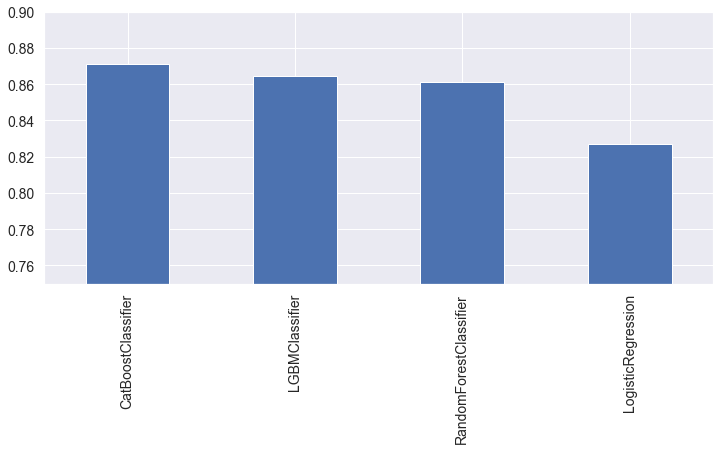

In [502]:
results = {'LogisticRegression': acc_logreg,
          'RandomForestClassifier': acc_rfc,
#           'XGBClassifier': acc_xgb, 
          'LGBMClassifier': acc_lgbm, 
          'CatBoostClassifier': acc_cat}

pd.Series(results, index=results.keys()).sort_values(ascending=False).plot(kind='bar')
plt.ylim([0.75, 0.9])

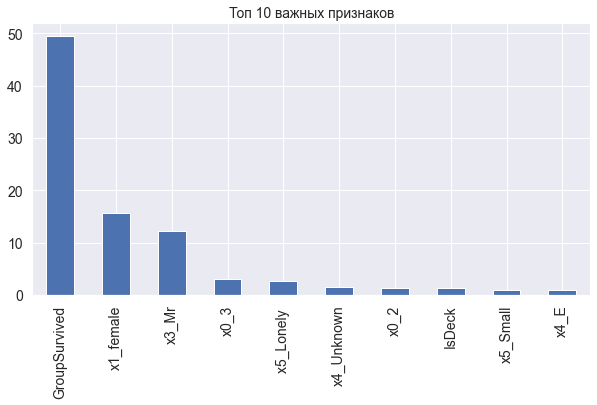

In [503]:
plt.figure(figsize=(10, 5))
importance = pd.Series(best_cat.feature_importances_, index=X_full.columns).nlargest(10)
importance.plot(kind='bar')
plt.title('Топ 10 важных признаков', fontsize=14)
plt.show()

Обучим финальную модель на лучшей из моделей на всех данных

## 5.4 Предсказание

In [504]:
final_model = CatBoostClassifier(random_state=42, verbose=False)

parameters = {'n_estimators': [1000, 2000],
                     'depth': [4, 6, 8],
                     'learning_rate': [0.001, 0.01, 0.1,],
                     'min_child_samples':[20, 40, 60],
                     'l2_leaf_reg': [3, 5, 7, 9]}

grid_final = GridSearchCV(final_model, parameters, cv=StratifiedKFold(n_splits=4), n_jobs=-1, scoring='accuracy', verbose=True)
grid_final.fit(X_full, y_full)
best_final = grid_final.best_estimator_

Fitting 4 folds for each of 216 candidates, totalling 864 fits


In [505]:
predictions = best_final.predict(X_pred)

In [506]:
output = pd.DataFrame({'PassengerId': X_pred.index, 'Survived': predictions})
output.to_csv('submission_titanic_cat6.csv', index=False)
print("Результат предсказания сохранен!")

Результат предсказания сохранен!
